In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': np.random.randint(40,size=100) ,
    'y': np.random.randint(40,size=100) 
})

In [2]:
df

,x,y
0,17,37
1,19,34
2,7,37
3,25,13
4,0,37
5,18,16
6,19,37
7,7,27
8,24,31
9,9,34


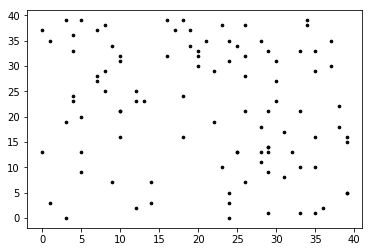

In [3]:
f1 = df['x'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)\

In [5]:
k = 2
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 13.   3.]
 [ 10.   6.]]


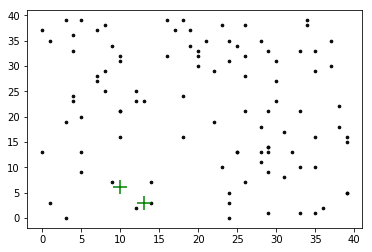

In [6]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='+', s=200, c='g')

In [7]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)
while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

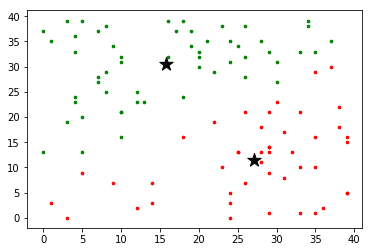

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [11]:
print(C)
print(centroids)

[[ 27.13333321  11.42222214]
 [ 15.80000019  30.58181763]]
[[ 16.50877193  30.54385965]
 [ 26.72093023  10.58139535]]


In [51]:
from KMedoids import KMedoids
import matplotlib.pyplot as plt

In [53]:
def plot_graphs(data, k_medoids):
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations')
    plt.show()

    medoid_data_points = []
    for m in k_medoids.medoids:
        medoid_data_points.append(data[m])   
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    x_ = [i[0] for i in medoid_data_points]
    y_ = [i[1] for i in medoid_data_points]
    plt.plot(x, y, 'yo')
    plt.plot(x_, y_, 'r*')
    plt.title('Mediods are highlighted in red')
    plt.show()

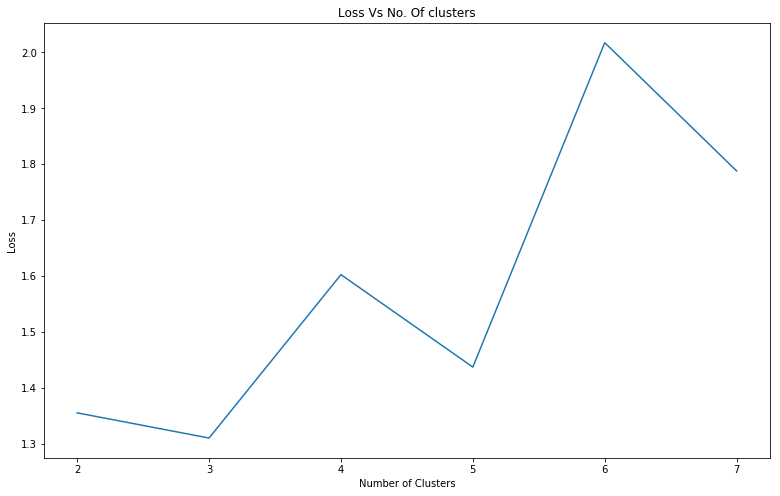

In [54]:
data_ = [
    [5.2, 3.7],[5.1,4.1], [5.2, 4.2], [5, 3.7], [5.3, 4], [5.5, 3.8], [5,4], [4.7, 3.7], [4.8, 4], [4.7, 3.3], [5.2, 3.3],[4.9,3.4], [5.3,3.5]
    ,[2.6, 1.5],[2.5, 1.2],[2.7, 1],[2.4,1.7],[2.6, 1.5],[2.7, 1.8], [2.1, 1.1], [2.2, 1.4], [2.3,0.8], [2.3, 1.3], [2.5,2]
    , [3, 3.5], [3.5, 3.8], [3.9, 3.2], [4.5, 1.9], [4.3, 1.4], [4, 2]
]
n_clusters = range(2,8)
k_medoids = [KMedoids(n_cluster=i) for i in n_clusters]
k_medoids = [k_medoid.fit(data_) for k_medoid in k_medoids]
loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]

# Plot elbow curve (to know best cluster count)
plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss Vs No. Of clusters')
plt.show()

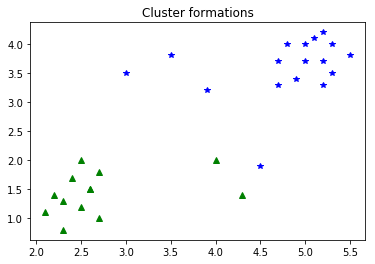

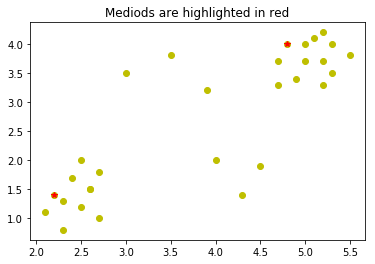

In [55]:
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data_)
plot_graphs(data_, k_medoids);

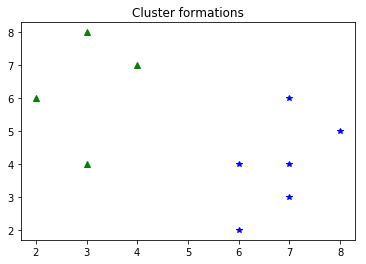

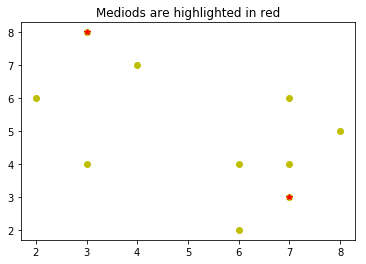

In [58]:
data = [[2, 6], [3, 4], [3, 8], [4, 7], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data)
plot_graphs(data, k_medoids)